<!-- dom:TITLE: PHY321: Classical Mechanics 1 -->
# PHY321: Classical Mechanics 1
<!-- dom:AUTHOR: Second midterm project, due Friday April 17 -->
<!-- Author: -->  
**Second midterm project, due Friday April 17**

Date: **Apr 6, 2020**

### Practicalities about  homeworks and projects

1. You can work in groups (optimal groups are often 2-3 people) or by yourself. If you work as a group you can hand in one answer only if you wish. **Remember to write your name(s)**!

2. How do I(we)  hand in?  Due to the extraordinary situation we are in now, the midterm should be handed in fully via D2L. You can scan your handwritten notes and upload to D2L or you can hand in everyhting (if you are ok with typing mathematical formulae using say Latex) as a jupyter notebook at D2L. The numerical part should always be handed in as a jupyter notebook.

### Introduction to the second midterm project, total score 100 points

In this midterm we will attempt at writing a program that simulates
the solar system. We start with the Earth-Sun system we studied in
homework 4 and study elliptical orbits and their properties. We test
also elliptical orbits and their dependence on powers $\beta$ of
$r^{\beta}$. We will test other aspects of the Earth-Sun system and
link these to the theoretical discussion on two-body problems with
central forces. 

Thereafter, based on the three-body problem studied in homework 9, we
attempt at making a code which simulates the solar system.

The relevant reading background is
1. chapter 8 of  Taylor.

2. Lecture notes on central forces and two-body problems

3. Homeworks 4, 7, 8 and 9

### Part 1 (50pt), the inverse-square law and the stability of planetary orbits

In homework 8 we studied an attractive potential

$$
V(r)=-\alpha/r,
$$

where the quantity $r$ is the absolute value of the relative position and $\alpha$ is a constant.

When we rewrote the equations of motion in polar coordinates, the analytical solution to the radial equation of motion was

$$
r(\phi) = \frac{c}{1+\epsilon\cos{(\phi)}},
$$

# where $c=L^2/\mu\alpha$, with
the reduced mass $\mu$ and the angular momentum $L$, as
discussed during the lectures. With the transformation of a two-body
problem to the center-of-mass frame, the actual equations look like an
*effective* one-body problem. 

The quantity $\epsilon$ is what we called the eccentricity. Since we will mainly study bounded orbits,
we have $0 \le \epsilon < 1$.
For the Earth, the orbit is indeed close to circular and at perihelion (the closest distance to the Sun), the Earth's center is about 0.98329 astronomical units (AU) or 147,098,070 km from the Sun's center. For Earth, the orbital eccentricity is $\epsilon\approx 0.0167$. The outer planets have more elliptical orbits. For example, Mars has its perihelion at 206,655,215 km and its apehelion at 249,232,432 km. 

In this part we will limit ourselves to the Earth-Sun system we studied in homework 4. You can reuse your code with either the Velocity-Verlet or the Euler-Cromer algorithms from homework 4.

This means also that $\alpha=GM_{\odot}M_{\mathrm{Earth}}$. We will
use $\alpha$ as a shorthand in the equations here. Keep in mind that
in homework 4 you scaled $GM_{\odot}=4\pi^2$ in your code.

The exercises here are all based on you analyzing the results from your code from homework 4.


* 1a (10pt) Use now your code from homework 4 (in cartesian coordinates). Start with a circular orbit setting $\epsilon=0$ and plot $x$ versus $y$. How would you choose the initial conditions to obtain a circular orbit?

* 1b (10pt) Check that for the case of a circular orbit that both the kinetic and the potential energies are conserved. Why do we expect such a result if we have a circular orbit? 

* 1c (10pt) With the same initial conditions (circular orbit) Use Kepler's second law (see Taylor section 3.4) to show that angular momentum is conserved. Compare the value you get with the angular momentum you get from a circular orbit. 

* 1d (10pt) Till now we have assumed that we have an inverse-square force $F(r) = -\alpha/r^2$. Let us rewrite this force as $F(r) = -\alpha/r^{\beta}$ with $\beta=[2,2.01,2.10,2.5,3.0,3.5]$. Run your Sun-Earth code with these values of $\beta$ and plot $x$ versus $y$ (you can use the same initial conditions or switch to eliptical orbits). Discuss your results. Can you use the observations of planetary motion to determine by what amount Nature deviates from a perfect inverse-square law? 

* 1e (10pt) Consider now an elliptical orbit with an initial position 1 AU from the Sun and an initial  velocity of 5 AU/yr. Show that the total energy is a constant (the kinetic and potential energies will vary). Show also that the angular momentum is a constant. If you change the parameter $\beta$ in $F(r) = -\alpha/r^{\beta}$ from $\beta=2$ to $\beta=3$, are these quantities conserved?  Discuss your results. (Hint: relate your results to Kepler's laws). 



1a 

In [49]:
%matplotlib inline

# let's start by importing useful packages we are familiar with
import numpy as np
from math import *
import matplotlib.pyplot as plt
import seaborn as sns
import math 
%matplotlib inline

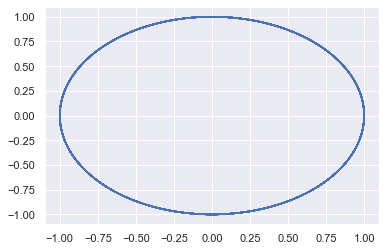

In [50]:
#Veloicty-Verlet Method
newDeltaT = 0.001
#set up arrays 
tfinal = 10 # in years
n = ceil(tfinal/newDeltaT)
# set up arrays for time t, velocity v, and position r
t = np.zeros(n)
v = np.zeros((n,2))
r = np.zeros((n,2))
#newa = np.zeros((n,2))
# Initial conditions as compact 2-dimensional arrays
r0 = np.array([1.0,0.0])
v0 = np.array([0.0,2*pi])
#newa0 = np.array(-Fourpi2*newr0)
r[0] = r0
v[0] = v0
#newa[0] = newa0
Fourpi2 = 4*pi*pi
# Start integrating using Euler's method
for i in range(n-1):
    # Set up the accelerationn
    # Here you could have defined your own function for this
    rabs = sqrt(sum(r[i]*r[i]))
    a = -Fourpi2*r[i]/(rabs**3)
    # update velocity, time and position using Euler's forward method
    r[i+1] = r[i] + newDeltaT*v[i] + ((newDeltaT**2)/2)*(a)
    rabs = sqrt(sum(r[i+1]*r[i+1]))
    agh_a = -4*(pi**2)*r[i+1]/(rabs**3)
    v[i+1] = v[i] + newDeltaT*(0.5)*(a + agh_a)
    t[i+1] = t[i] + newDeltaT
sns.set()
plt.plot(r[:,0], r[:,1])

1b

In [51]:
r.shape[0]

10000

In [52]:
def kinetic_energy(v):
    KE = []
    step = len(t)
    for i in range(step):
        KE.append(0)
        KE[i] += 0.5 *np.linalg.norm(v[i])**2
    return np.array(KE)

In [53]:
def pot():
    Pot = []
    step = len(t)
    for i in range(step):
        Pot.append(0)
        Pot[i] +=  - 1.2 * 10**(-4) *333000/ np.linalg.norm(r[i])
    return np.array(Pot)

In [54]:
len(kinetic_energy(v))

10000

In [55]:
len(pot())

10000

Text(0, 0.5, 'E $\\left[\\frac{M_E AU^2}{yr^2}\\right]$')

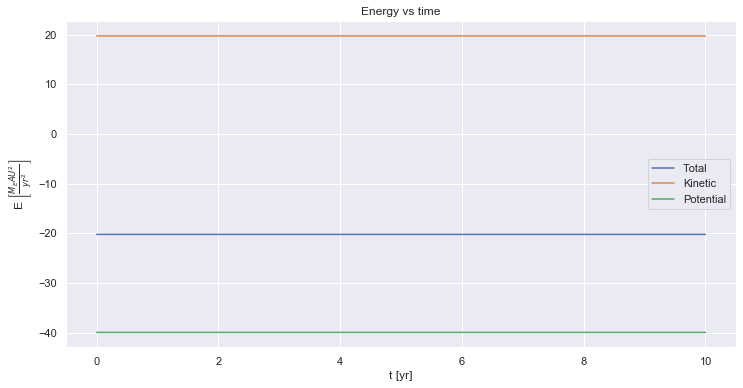

In [56]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(t,kinetic_energy(v)+pot(),label='Total')
ax.plot(t,kinetic_energy(v),label='Kinetic')
ax.plot(t,pot(),label='Potential')
ax.set_title('Energy vs time')
ax.set_xlabel('t [yr]')
ax.legend()
ax.set_ylabel(r'E $\left[\frac{M_E AU^2}{yr^2}\right]$')


From midterm 1 and previous homeworks, it has been derived that energy is conserved for a two body system. Therefore, this leads to a perfectly circular orbit because the net force is 0.

1c

In [63]:
def AreaCalc(rad1,rad2):
    rad1n = np.linalg.norm(rad1)
    rad2n = np.linalg.norm(rad2)
    theta1 = math.atan(abs(rad1[1]/rad1[0]))
    theta2 = math.atan(abs(rad2[1]/rad2[0]))
    radn = 0.5*(rad1n+rad2n)
    delta_theta = np.abs(theta1 - theta2)
    return 0.5*delta_theta*radn**2

In [73]:
def AngMomentum(rad,vel):
    radn = np.linalg.norm(rad)
    veln = np.linalg.norm(vel)
    rad = rad/radn
    vel = vel/veln
    dotprod = rad[0]*vel[0]+rad[1]*vel[1]
    theta = math.acos(dotprod)
    return radn*veln*np.sin(theta)

In [74]:
AreaVal = np.zeros(len(t))
AreaVal[0] = 0
AngMo = np.zeros(len(t))  
AngMo[0] = AngMomentum(r[0,:],v[0,:])

In [75]:
for i in range(0,len(t)-1):
    AreaVal[i+1] = AreaVal[i] + AreaCalc(r[i,:],r[i+1,:])
    AngMo[i+1] = AngMomentum(r[i+1,:],v[i+1,:])

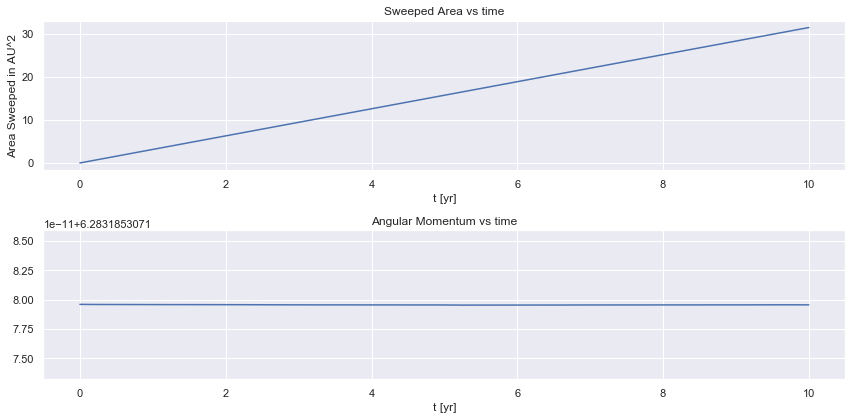

In [83]:
fig, ax = plt.subplots(2,1,figsize=(12,6))
ax[0].plot(t,AreaVal,label='Area')
ax[0].set_title('Sweeped Area vs time')
ax[0].set_xlabel('t [yr]')
ax[0].set_ylabel('Area Sweeped in AU^2')

ax[1].plot(t,AngMo,label='Angular Momentum')
ax[1].set_title('Angular Momentum vs time')
ax[1].set_xlabel('t [yr]')
plt.tight_layout()

1d

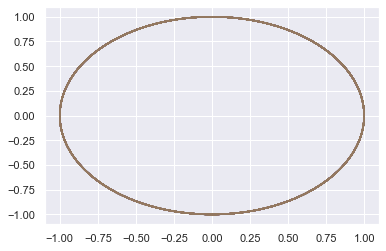

In [92]:
b = [2., 2.01, 2.1, 2.5, 3.0, 3.5]
for j in range(len(b)):
    const = b[j]
    for i in range(n-1):
        # Set up the accelerationn
        # Here you could have defined your own function for this
        rabs = sqrt(sum(r[i]*r[i]))
        a = -Fourpi2*r[i]/(rabs**(const+1))
        # update velocity, time and position using Euler's forward method
        r[i+1] = r[i] + newDeltaT*v[i] + ((newDeltaT**2)/2)*(a)
        rabs = sqrt(sum(r[i+1]*r[i+1]))
        agh_a = -4*(pi**2)*r[i+1]/(rabs**3)
        v[i+1] = v[i] + newDeltaT*(0.5)*(a + agh_a)
        t[i+1] = t[i] + newDeltaT
    plt.plot(r[:,0], r[:,1])

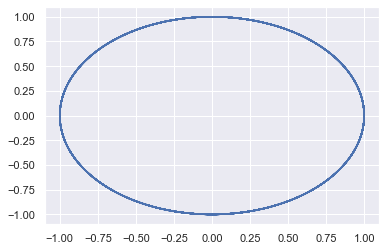

In [90]:
for i in range(n-1):
    # Set up the accelerationn
    # Here you could have defined your own function for this
    rabs = sqrt(sum(r[i]*r[i]))
    a = -Fourpi2*r[i]/(rabs**(4))
    # update velocity, time and position using Euler's forward method
    r[i+1] = r[i] + newDeltaT*v[i] + ((newDeltaT**2)/2)*(a)
    rabs = sqrt(sum(r[i+1]*r[i+1]))
    agh_a = -4*(pi**2)*r[i+1]/(rabs**3)
    v[i+1] = v[i] + newDeltaT*(0.5)*(a + agh_a)
    t[i+1] = t[i] + newDeltaT
plt.plot(r[:,0], r[:,1])

1e

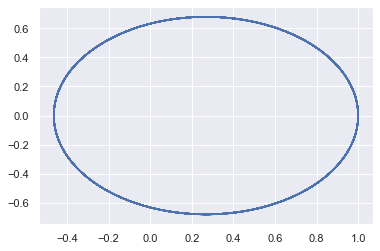

In [93]:
#Veloicty-Verlet Method
newDeltaT = 0.001
#set up arrays 
tfinal = 10 # in years
n = ceil(tfinal/newDeltaT)
# set up arrays for time t, velocity v, and position r
t = np.zeros(n)
v = np.zeros((n,2))
r = np.zeros((n,2))
#newa = np.zeros((n,2))
# Initial conditions as compact 2-dimensional arrays
r0 = np.array([1.0,0.0])
v0 = np.array([0.0,5])
#newa0 = np.array(-Fourpi2*newr0)
r[0] = r0
v[0] = v0
#newa[0] = newa0
Fourpi2 = 4*pi*pi
# Start integrating using Euler's method
for i in range(n-1):
    # Set up the accelerationn
    # Here you could have defined your own function for this
    rabs = sqrt(sum(r[i]*r[i]))
    a = -Fourpi2*r[i]/(rabs**3)
    # update velocity, time and position using Euler's forward method
    r[i+1] = r[i] + newDeltaT*v[i] + ((newDeltaT**2)/2)*(a)
    rabs = sqrt(sum(r[i+1]*r[i+1]))
    agh_a = -4*(pi**2)*r[i+1]/(rabs**3)
    v[i+1] = v[i] + newDeltaT*(0.5)*(a + agh_a)
    t[i+1] = t[i] + newDeltaT
sns.set()
plt.plot(r[:,0], r[:,1])

Text(0, 0.5, 'E $\\left[\\frac{M_E AU^2}{yr^2}\\right]$')

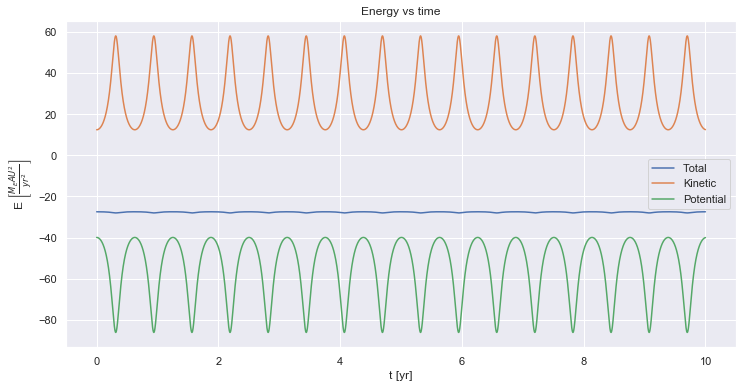

In [94]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(t,kinetic_energy(v)+pot(),label='Total')
ax.plot(t,kinetic_energy(v),label='Kinetic')
ax.plot(t,pot(),label='Potential')
ax.set_title('Energy vs time')
ax.set_xlabel('t [yr]')
ax.legend()
ax.set_ylabel(r'E $\left[\frac{M_E AU^2}{yr^2}\right]$')

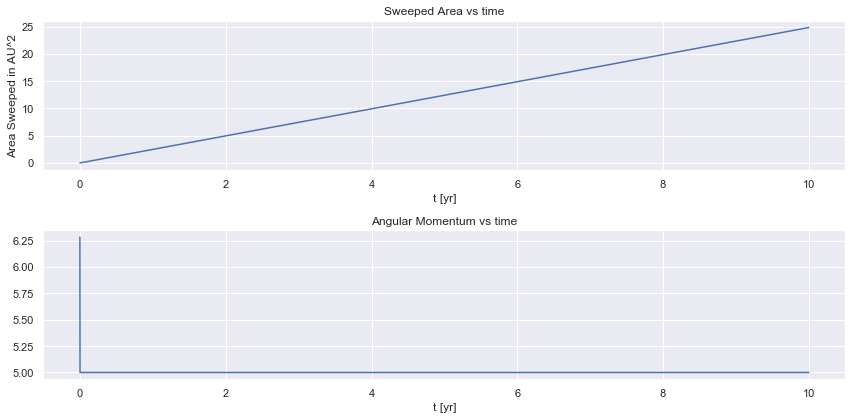

In [98]:
for i in range(0,len(t)-1):
    AreaVal[i+1] = AreaVal[i] + AreaCalc(r[i,:],r[i+1,:])
    AngMo[i+1] = AngMomentum(r[i+1,:],v[i+1,:])
fig, ax = plt.subplots(2,1,figsize=(12,6))
ax[0].plot(t,AreaVal,label='Area')
ax[0].set_title('Sweeped Area vs time')
ax[0].set_xlabel('t [yr]')
ax[0].set_ylabel('Area Sweeped in AU^2')

ax[1].plot(t,AngMo,label='Angular Momentum')
ax[1].set_title('Angular Momentum vs time')
ax[1].set_xlabel('t [yr]')
plt.tight_layout()

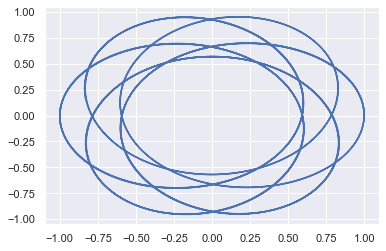

In [99]:
for i in range(n-1):
    # Set up the accelerationn
    # Here you could have defined your own function for this
    rabs = sqrt(sum(r[i]*r[i]))
    a = -Fourpi2*r[i]/(rabs**(2))
    # update velocity, time and position using Euler's forward method
    r[i+1] = r[i] + newDeltaT*v[i] + ((newDeltaT**2)/2)*(a)
    rabs = sqrt(sum(r[i+1]*r[i+1]))
    agh_a = -4*(pi**2)*r[i+1]/(rabs**3)
    v[i+1] = v[i] + newDeltaT*(0.5)*(a + agh_a)
    t[i+1] = t[i] + newDeltaT
sns.set()
plt.plot(r[:,0], r[:,1])

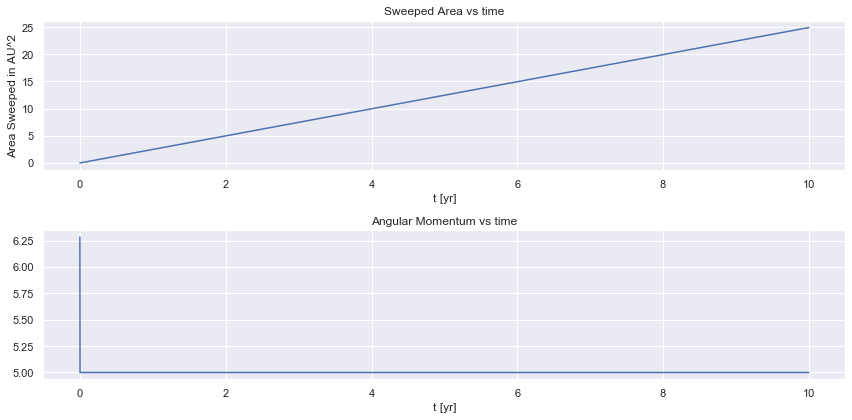

In [100]:
for i in range(0,len(t)-1):
    AreaVal[i+1] = AreaVal[i] + AreaCalc(r[i,:],r[i+1,:])
    AngMo[i+1] = AngMomentum(r[i+1,:],v[i+1,:])
fig, ax = plt.subplots(2,1,figsize=(12,6))
ax[0].plot(t,AreaVal,label='Area')
ax[0].set_title('Sweeped Area vs time')
ax[0].set_xlabel('t [yr]')
ax[0].set_ylabel('Area Sweeped in AU^2')

ax[1].plot(t,AngMo,label='Angular Momentum')
ax[1].set_title('Angular Momentum vs time')
ax[1].set_xlabel('t [yr]')
plt.tight_layout()

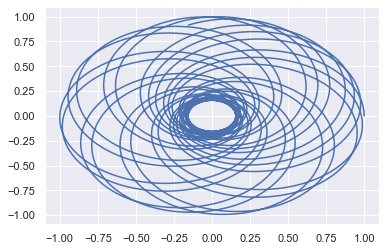

In [101]:
for i in range(n-1):
    # Set up the accelerationn
    # Here you could have defined your own function for this
    rabs = sqrt(sum(r[i]*r[i]))
    a = -Fourpi2*r[i]/(rabs**(4))
    # update velocity, time and position using Euler's forward method
    r[i+1] = r[i] + newDeltaT*v[i] + ((newDeltaT**2)/2)*(a)
    rabs = sqrt(sum(r[i+1]*r[i+1]))
    agh_a = -4*(pi**2)*r[i+1]/(rabs**3)
    v[i+1] = v[i] + newDeltaT*(0.5)*(a + agh_a)
    t[i+1] = t[i] + newDeltaT
sns.set()
plt.plot(r[:,0], r[:,1])

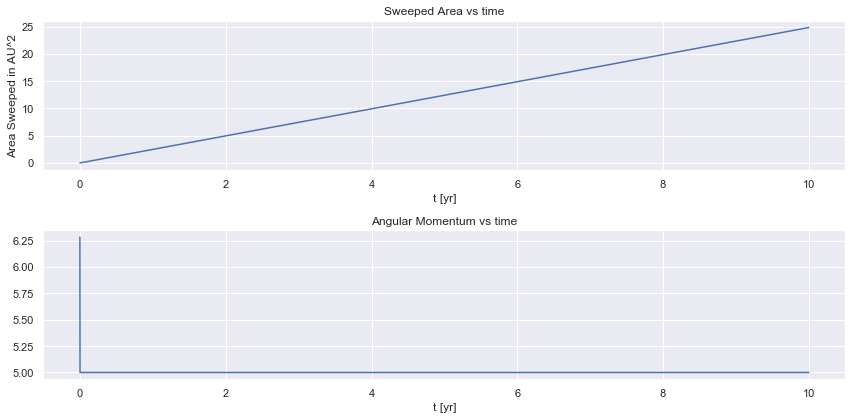

In [102]:
for i in range(0,len(t)-1):
    AreaVal[i+1] = AreaVal[i] + AreaCalc(r[i,:],r[i+1,:])
    AngMo[i+1] = AngMomentum(r[i+1,:],v[i+1,:])
fig, ax = plt.subplots(2,1,figsize=(12,6))
ax[0].plot(t,AreaVal,label='Area')
ax[0].set_title('Sweeped Area vs time')
ax[0].set_xlabel('t [yr]')
ax[0].set_ylabel('Area Sweeped in AU^2')

ax[1].plot(t,AngMo,label='Angular Momentum')
ax[1].set_title('Angular Momentum vs time')
ax[1].set_xlabel('t [yr]')
plt.tight_layout()

According to Kepler's first law, planets follow an ellipse orbit with a sun a a focus. Based on the graph produced, this holds true.

According to Kepler's second law, planets sweep an equal amount of area in the same change in time. This is true because according to the sweeped area vs time, if this were not true, the graph would not provide a linear relationship, and this is seen regardless of the changing of $\beta$.

Based on the results, angular momentum is a constant, regardless of the changes of the parameter $\beta$. This is because the net force of the system is zero. Because $\frac{dL}{dt} = \frac{dr}{dt} \times \vec{p} + r \times \frac{dp}{dt}$, and net force is $\frac{dp}{dt} = 0$ and $r$ is constant, $\frac{dL}{dt}$ is also 0, meaning that $L$ is a constant, or $\frac{dL}{dt} = 0$.  

### Part 2 (50pt), making a program for the solar system

Our final aim is to write a code which includes the known planets of the solar system. 

We will, as before, use so-called astronomical units when rewriting our equations. 
Using astronomical units (AU as abbreviation)it means that 
one astronomical unit of length, known as 1 AU, is the average distance between the Sun and Earth, that is
$1$ AU = $1.5\times 10^{11}$ m.  It can also be convenient to use years instead of seconds since years match
better the time evolution of the solar system. The mass of the Sun is $M_{\mathrm{sun}}=M_{\odot}=2\times 10^{30}$ kg. The masses of all relevant planets and their distances from the sun are listed in the table here in kg and AU.

<table border="1">
<thead>
<tr><th align="center"> Planet</th> <th align="center">                 Mass in kg                </th> <th align="center">Distance to  sun in AU</th> </tr>
</thead>
<tbody>
<tr><td align="center">   Earth      </td> <td align="center">   $M_{\mathrm{Earth}}=6\times 10^{24}$ kg        </td> <td align="center">   1AU                       </td> </tr>
<tr><td align="center">   Jupiter    </td> <td align="center">   $M_{\mathrm{Jupiter}}=1.9\times 10^{27}$ kg    </td> <td align="center">   5.20 AU                   </td> </tr>
<tr><td align="center">   Mars       </td> <td align="center">   $M_{\mathrm{Mars}}=6.6\times 10^{23}$ kg       </td> <td align="center">   1.52 AU                   </td> </tr>
<tr><td align="center">   Venus      </td> <td align="center">   $M_{\mathrm{Venus}}=4.9\times 10^{24}$ kg      </td> <td align="center">   0.72 AU                   </td> </tr>
<tr><td align="center">   Saturn     </td> <td align="center">   $M_{\mathrm{Saturn}}=5.5\times 10^{26}$ kg     </td> <td align="center">   9.54 AU                   </td> </tr>
<tr><td align="center">   Mercury    </td> <td align="center">   $M_{\mathrm{Mercury}}=3.3\times 10^{23}$ kg    </td> <td align="center">   0.39 AU                   </td> </tr>
<tr><td align="center">   Uranus     </td> <td align="center">   $M_{\mathrm{Uranus}}=8.8\times 10^{25}$ kg     </td> <td align="center">   19.19 AU                  </td> </tr>
<tr><td align="center">   Neptun     </td> <td align="center">   $M_{\mathrm{Neptun}}=1.03\times 10^{26}$ kg    </td> <td align="center">   30.06 AU                  </td> </tr>
<tr><td align="center">   Pluto      </td> <td align="center">   $M_{\mathrm{Pluto}}=1.31\times 10^{22}$ kg     </td> <td align="center">   39.53 AU                  </td> </tr>
</tbody>
</table>
Pluto is no longer considered  a planet, but we add it here for historical reasons. It is optional in this midterm project to include Pluto and eventual moons. 

In setting up the equations we can limit ourselves to a co-planar motion and use only the $x$ and $y$ coordinates. But you should feel free to extend your equations to three dimensions, it is not very difficult and the data from NASA are all in three dimensions.

[NASA](http://www.nasa.gov/index.html) has an excellent site at <http://ssd.jpl.nasa.gov/horizons.cgi#top>.
From there you can extract initial conditions in order to start your differential equation solver.
At the above website you need to change from **OBSERVER** to **VECTOR** and then write in the planet you are interested in.
The generated data contain the $x$, $y$ and $z$ values as well as their corresponding velocities. The velocities are in units of AU per day.
Alternatively they can be obtained in terms of km and km/s. 


* 2a (50pt) Since the Sun is much more massive than all the other planets, we will define the Sun as our center of mass and set its velocity and position to zero. You can use your code from homework 9 and add gradually one planet at the time. Develop a code which simulates the solar system with the above planets and plot their orbits. Discuss your results.